## imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
# scikit
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from sklearn.datasets import make_regression

## carga de datos

In [2]:
#  CARGA DATAFRAME ATRIBUTOS
df_atributos = pd.read_excel('dfAtributosNormalizado.xlsx').drop('Unnamed: 0',axis=1)
df_atributos.head()

,mlotst_0,zos_0,bottomT_0,thetao_0,so_0,uo_0,vo_0,Profundidad_izq_1_0,mlotst_izq_1_0,zos_izq_1_0,...,uo_inf_2.1_10,vo_inf_2.1_10,Profundidad_inf_2.2_10,mlotst_inf_2.2_10,zos_inf_2.2_10,bottomT_inf_2.2_10,thetao_inf_2.2_10,so_inf_2.2_10,uo_inf_2.2_10,vo_inf_2.2_10
0,0.140996,0.000269,0.036447,0.036444,0.094784,0.000102,0.000111,0.001405,0.146636,0.000272,...,0.000023,0.000123,0.027217,0.146636,0.000276,0.029729,0.036786,0.095019,0.000017,0.000092
1,0.042438,0.000345,0.050648,0.049995,0.147476,0.001679,0.000431,0.002181,0.038396,0.000365,...,-0.000146,-0.000711,0.042260,0.049848,0.000435,0.049711,0.049523,0.147429,-0.000474,-0.000294
2,0.056131,0.000752,0.037047,0.048200,0.128054,0.001256,-0.000185,0.001893,0.040344,0.000370,...,0.000065,0.000515,0.036681,0.145005,0.000394,0.047392,0.047223,0.127628,-0.000140,0.000379
3,0.069139,0.000338,0.047751,0.047637,0.123815,0.000150,0.000023,0.001835,0.087273,0.000337,...,-0.000048,0.000025,0.035553,0.152445,0.000188,0.045738,0.045694,0.123940,0.000077,0.000440
4,0.074873,0.000262,0.043182,0.043170,0.112852,0.000101,0.000248,0.001672,0.098626,0.000263,...,-0.000014,0.000229,0.032395,0.138903,0.000082,0.041246,0.041244,0.112888,-0.000010,0.000390


In [3]:
#  CARGA DATAFRAME AVISTAMIENTOS
df_avistamientos = pd.read_excel('dfAvistamientos.xlsx').drop('Unnamed: 0',axis=1)
df_avistamientos.head()

,Avistamientos
0,1
1,1
2,1
3,20
4,151


In [4]:
# DATAFRAMES A LISTAS
listado_atributos = df_atributos.values.tolist()
listado_avistamientos = df_avistamientos.values.tolist()
# CONJUNTOS DE ENTRENAMIENTO Y TEST
atributos_train, atributos_test, avistamientos_train, avistamientos_test = train_test_split(listado_atributos,listado_avistamientos,test_size=0.2)
atributos_train = np.array(atributos_train)
atributos_test = np.array(atributos_test)
avistamientos_train = np.ravel(np.array(avistamientos_train))
avistamientos_test = np.ravel(np.array(avistamientos_test))

In [5]:
def imprimir(mod,X_test,Y_test,Y_prediccion):
    # COEFICIENTES (pendientes)
    print('Coeficientes:')
    print(mod.coef_)
    print(mod.intercept_)
    # The mean squared error
    print('Error cuadrático medio: %.2f'% mean_squared_error(Y_test, Y_prediccion))
    # The coefficient of determination: 1 is perfect prediction
    print('Coeficiente de determinación con datos test: %.2f'% mod.score(X_test, Y_test)) 
    print('Coeficiente de determinación con datos train: %.2f'% mod.score(atributos_train, avistamientos_train)) 


    # datos que teniamos y los uqe hemos obtenido
    # [print(Y_test[i],Y_pred[i]) for i in range(len(Y_pred))]

### Regresion Lineal
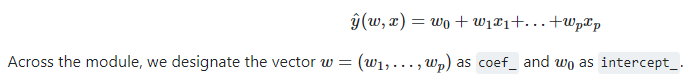

In [16]:
# REGRESION LINEAL
lr = linear_model.LinearRegression()
# se entrena al modelo
lr.fit(atributos_train,avistamientos_train)
# prediccion
avistamientos_prediccion_lineal = lr.predict(atributos_test)

In [7]:
imprimir(lr,atributos_test,avistamientos_test,avistamientos_prediccion_lineal)

Coeficientes:
[-6.58975662e+02  2.77022818e+05  4.10594101e+02  1.07420647e+05
 -7.73149108e+04 -6.58982952e+06 -9.53448528e+05 -4.44351164e+01
 -1.25220710e+03 -1.60179341e+06  3.72424415e+02 -5.79796059e+04
  5.28514559e+05  4.68606687e+06  1.69853704e+06 -4.44351203e+01
  1.15669558e+03  4.69316647e+06  1.78710313e+03  4.48978240e+04
 -5.00478539e+05 -6.19961888e+06 -2.77139484e+06 -4.44351189e+01
 -1.16276986e+03 -1.21254320e+06 -2.88627996e+02  4.72044781e+04
  3.92504653e+04 -1.00280700e+06 -7.20893754e+05 -4.44351122e+01
  5.31034082e+02 -2.35828628e+04 -5.85485554e+02  3.07271184e+04
  4.11269220e+05  4.55110521e+06 -5.09743157e+05 -4.44351152e+01
  3.25005863e+02 -1.39189803e+05 -1.77538570e+03 -1.88611682e+04
 -1.36927950e+05 -1.87333318e+05  5.08554994e+03 -4.44351157e+01
  1.74243000e+03  7.42696865e+06  3.31455451e+03 -6.36107755e+05
 -9.08771140e+05 -5.01342375e+05 -2.68122095e+06 -4.44351143e+01
 -1.22186773e+03 -7.20446204e+06 -2.05877409e+03  1.05643729e+06
  2.0283615

### Polinomial

In [23]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression(fit_intercept=False))])
model = model.fit(atributos_train,avistamientos_train)

model.named_steps['linear'].coef_


array([ 2.73223674e+14,  5.31167038e+14,  1.79432129e+15, ...,
       -3.23120198e+08, -5.71376467e+08, -9.34376515e+08])

In [24]:
model.score(atributos_test,avistamientos_test)

-3.885259109165519e+18

### Random Forest

In [8]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(atributos_train,avistamientos_train)

avistamientos_prediccion_rf = rf.predict(atributos_test)
rf.score(atributos_test,avistamientos_test)

-0.1945397379069711

### Vecino más cercano

In [9]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=10)
neigh.fit(atributos_train,avistamientos_train)

avistamientos_prediccion_vecinos = neigh.predict(atributos_test)
print(neigh.score(atributos_test,avistamientos_test))

[print('{} - {}'.format(avistamientos_test[i],avistamientos_prediccion_vecinos[i])) for i in range(len(avistamientos_test))]

0.17375649848250574
1021 - 551.3
24 - 8.0
4 - 30.6
8 - 100.1
4 - 144.1
5 - 9.7
6 - 44.6
101 - 31.2
5 - 8.0
200 - 94.8
1 - 23.9
265 - 28.4
96 - 15.8
220 - 243.5
276 - 107.6
42 - 64.5
1 - 12.1
3 - 6.3
5 - 39.4
45 - 21.0
17 - 5.4
24 - 17.5
27 - 61.4
117 - 37.8
10 - 43.5
31 - 146.0
2 - 19.0
51 - 88.3
2 - 113.8
85 - 60.2
72 - 35.9
6 - 5.0
50 - 21.4
200 - 223.5
25 - 8.9
9 - 62.8
27 - 174.0
7 - 22.7
8 - 6.5
10 - 21.4
4 - 7.2
550 - 21.9
1 - 54.4
85 - 31.6
2 - 61.6
2 - 8.0
94 - 14.7
5 - 7.2
30 - 307.6
268 - 233.1
2 - 108.7
20 - 40.7
4 - 130.8
42 - 19.8
500 - 83.2
1 - 11.8
12 - 237.7
19 - 13.6
2 - 30.6
1 - 40.1
18 - 4.7
1 - 8.2
459 - 38.4
42 - 37.8
8 - 19.2
1 - 102.9
60 - 55.7
90 - 60.4
12 - 21.9
25 - 7.0
3 - 285.7
3 - 42.5
5 - 33.7
40 - 43.8
1 - 14.6
21 - 9.7
4 - 7.7
9 - 22.2
7 - 37.8
21 - 11.9
1 - 100.0
12 - 5.5
16 - 20.8
59 - 69.6
7 - 16.3
5 - 23.4
112 - 15.8
3 - 13.6
3 - 254.7
26 - 5.7
6 - 71.1
1 - 226.4
13 - 116.7
961 - 128.8
12 - 75.5
25 - 7.7
7 - 234.9
14 - 14.3
7 - 13.6
10 - 10.1
40 - 17

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

### SVM

In [10]:
from sklearn import svm
svm_reg = svm.SVR()
svm_reg.fit(atributos_train,avistamientos_train)

avistamientos_prediccion_svm = svm_reg.predict(atributos_test)
print(svm_reg.score(atributos_test,avistamientos_test))

-0.1044516205910555


### arboles de decision

In [11]:
from sklearn.tree import DecisionTreeRegressor
dectree = DecisionTreeRegressor(max_depth= 50 )

dectree.fit(atributos_train,avistamientos_train)

avistamientos_prediccion_dectree = dectree.predict(atributos_test)
print(dectree.score(atributos_test,avistamientos_test))

-2.9966510179125767
